# Azure OpenAI Embeddings

## Set up environment

In [1]:
import os
from dotenv import load_dotenv # pip install python-dotenv
from openai import AzureOpenAI # pip install openai

if not load_dotenv("./../../config/credentials_my.env"):
    print("Environment variables not loaded, cell execution stopped")
    sys.exit()
print("Environment variables have been loaded ;-)")

chat_model                     = os.environ["MODEL_DEPLOYMENT_NAME"]
embeddings_model_2_model       = os.environ["AZURE_OPENAI_EMBEDDING_ADA2_DEPLOYMENT"]
embeddings_model_3_small_model = os.environ["AZURE_OPENAI_EMBEDDING_3SMALL_DEPLOYMENT"]
embeddings_model_3_large_model = os.environ["AZURE_OPENAI_EMBEDDING_3LARGE_DEPLOYMENT"]

client = AzureOpenAI(
  api_version = os.getenv("AZURE_OPENAI_API_VERSION")
  # api_key = os.getenv("AZURE_OPENAI_API_KEY"),
  # azure_endpoint = os.getenv("AZURE_OPENAI_ENDPOINT")
)

Environment variables have been loaded ;-)


## Test embeddings generation

In [2]:
client.embeddings.create(input = ["Rabbit"], model=embeddings_model_2_model).data[0].embedding[:5]

[-0.016392488032579422,
 -0.008066761307418346,
 -0.019901463761925697,
 -0.011439780704677105,
 -0.02131282351911068]

## Create a helper function

In [3]:
def generate_embeddings(text, model="text-embedding-ada-002"): # model = "deployment_name"
    return client.embeddings.create(input = [text], model=model).data[0].embedding

generate_embeddings("Rabbit")[:5]

[-0.016392488032579422,
 -0.008066761307418346,
 -0.019901463761925697,
 -0.011439780704677105,
 -0.02131282351911068]

# Test different embeddings models

In [4]:
for m in (embeddings_model_2_model, embeddings_model_3_small_model, embeddings_model_3_large_model):
    embeddings = generate_embeddings(text="anatine amigos", model=m)
    print(f"Embeddings in ({m}): {len(embeddings)}. First elements: {[round(embeddings[i],3) for i in [0,1,2,-1]]}")    

Embeddings in (text-embedding-ada-002): 1536. First elements: [-0.027, -0.001, 0.02, -0.023]
Embeddings in (text-embedding-3-small): 1536. First elements: [0.016, -0.026, 0.025, 0.02]
Embeddings in (text-embedding-3-large): 3072. First elements: [-0.06, 0.005, -0.006, 0.007]


# Choose our model

In [5]:
model = embeddings_model_3_small_model

# Calculate Word Embeddings
To use word embeddings for semantic search, you first compute the embeddings for a corpus of text using a word embedding algorithm. What does this mean? We are going to create a numerical representation of each of these words. To perform this computation, we'll use OpenAI's 'get_embedding' function.

Since we have our words in a pandas dataframe, we can use "apply" to apply the get_embedding function to each row in the dataframe. We then store the calculated word embeddings in a new text file called "word_embeddings.csv" so that we don't have to call OpenAI again to perform these calculations.

# Learn how to generate embeddings with Azure OpenAI
https://learn.microsoft.com/en-us/azure/cognitive-services/openai/how-to/embeddings?tabs=console

In [6]:
import numpy as np
embeddings = generate_embeddings("rabbit")
print(f"embeddings shape: {np.array(embeddings).shape}. Now showing the first 5 elements:\n{embeddings[:5]}")

embeddings shape: (1536,). Now showing the first 5 elements:
[-0.005343053489923477, -0.02197130396962166, -0.01593860052525997, -0.011201603338122368, -0.01291528157889843]


# Cosine similarity
https://en.wikipedia.org/wiki/Cosine_similarity
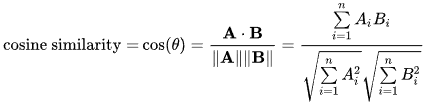

In [7]:
v1 = np.array([1,2,3])
v2 = np.array([4,5,6])
numerator = np.dot(v1,v2) # 4+10+18
print(numerator)

32


In [8]:
denominator_1 = np.linalg.norm(v1) # sqrt (1+4+9) = 3.74
denominator_2 = np.linalg.norm(v2) # sqrt (16+25+36) = 8.77
denominator   = denominator_1 * denominator_2
print(denominator)

32.83291031876401


In [9]:
print(numerator / denominator)

0.9746318461970762


In [10]:
def cosine_similarity(v1,v2):
    numerator = np.dot(v1,v2)
    denumerator = np.linalg.norm(v1) * np.linalg.norm(v2)
    return numerator / denumerator

cs = cosine_similarity(np.array([1,2,3]),np.array([4,5,6]))
print(cs)

0.9746318461970762


In [11]:
cs = cosine_similarity(np.array([1,2,3,-1,2,3,-1,2,3,-1,2,3]),np.array([-4,5,6,4,5,-6,4,5,-6,4,5,6]))
print(cs)

0.1827434711619518


## Create an embedding for a single word

In [12]:
#openai.Embedding.create(input="rabbit", engine=azure_openai_deployment_emb)['data'][0]['embedding']
generate_embeddings("rabbit")[:30]

[-0.005408289842307568,
 -0.02199557051062584,
 -0.016015786677598953,
 -0.011248685419559479,
 -0.012928321026265621,
 0.007422459311783314,
 -0.009248454123735428,
 -0.03334182873368263,
 -0.019026586785912514,
 -0.014266454614698887,
 0.02008594200015068,
 0.008439998142421246,
 0.0071785287000238895,
 -0.02444881573319435,
 0.0004499648348428309,
 -0.0044499910436570644,
 0.03063768334686756,
 -0.0027581581380218267,
 0.020239269360899925,
 0.0031292811036109924,
 0.0024933191016316414,
 -0.00993146002292633,
 -0.01963989809155464,
 -0.028686238452792168,
 -0.016196992248296738,
 -0.003693806007504463,
 0.01853872463107109,
 -0.00660354970023036,
 -0.004861188121140003,
 -0.013848287984728813]

## Check distance between two words

In [13]:
v1 = generate_embeddings("rabbit")
v2 = generate_embeddings("dog") # dog, elephant, car, space shuttle

cs = cosine_similarity(v1,v2)
print(cs)

0.8604962479460537


# Read Data File Containing Words
Now that we have configured OpenAI, let's start with a simple CSV file with familiar words

In [14]:
import pandas as pd
file_name = 'words'
df = pd.read_csv(f'{file_name}.csv')
print(df)

            text
0            red
1       potatoes
2           soda
3         cheese
4          water
5           blue
6         crispy
7      hamburger
8         coffee
9          green
10          milk
11      la croix
12        yellow
13     chocolate
14  french fries
15         latte
16          cake
17         brown
18  cheeseburger
19      espresso
20    cheesecake
21         black
22         mocha
23         fizzy
24        carbon
25        banana


In [15]:
try:    
    #df["text_embeddings"] = df["text"].apply(lambda x: openai.Embedding.create(input=x, engine=azure_openai_deployment_emb)['data'][0]['embedding'])
    df["text_embeddings"] = df["text"].apply(lambda x: generate_embeddings(x))
    df.to_pickle(f"{file_name}_enriched.pkl") # type(df['embeddings'][0][0]) --> float  
except:
    #print('switching to pickle file...')
    df = pd.read_pickle(f"{file_name}_enriched.pkl")

df

,text,text_embeddings
0,red,"[9.326533472631127e-06, -0.02476814016699791, ..."
1,potatoes,"[0.005080870818346739, -0.031054075807332993, ..."
2,soda,"[0.02577228657901287, -0.007436878979206085, -..."
3,cheese,"[-0.0032272646203637123, -0.008705058135092258..."
4,water,"[0.01912183128297329, -0.012477339245378971, 0..."
5,blue,"[0.005474964156746864, -0.007486246060580015, ..."
6,crispy,"[-0.0010263145668432117, -0.00545493233948946,..."
7,hamburger,"[-0.013137392699718475, -0.0018266240367665887..."
8,coffee,"[-0.000679703603964299, -0.01955685019493103, ..."
9,green,"[0.01546180434525013, -0.010975971817970276, 0..."


In [16]:
search_term = input ('Insert a search term:\n') # "hot dog", "torta"...

#search_term_vector = openai.Embedding.create(input=search_term, engine=azure_openai_deployment_emb)['data'][0]['embedding']
search_term_vector = generate_embeddings(search_term)
df["similarity"] = df["text_embeddings"].apply(lambda x: cosine_similarity(x,search_term_vector))
df = df.sort_values("similarity", ascending=False)
df

Insert a search term:
 hot dog


,text,text_embeddings,similarity
7,hamburger,"[-0.013137392699718475, -0.0018266240367665887...",0.876688
18,cheeseburger,"[-0.018409615382552147, 0.005138860084116459, ...",0.856879
14,french fries,"[0.00143189518712461, -0.01648160256445408, 0....",0.838439
3,cheese,"[-0.0032272646203637123, -0.008705058135092258...",0.823422
2,soda,"[0.02577228657901287, -0.007436878979206085, -...",0.820836
6,crispy,"[-0.0010263145668432117, -0.00545493233948946,...",0.820629
1,potatoes,"[0.005080870818346739, -0.031054075807332993, ...",0.816993
13,chocolate,"[0.0014886129647493362, -0.013025964610278606,...",0.816503
16,cake,"[-0.013660978525876999, -0.016728799790143967,...",0.812063
0,red,"[9.326533472631127e-06, -0.02476814016699791, ...",0.811867


In [17]:
search_term = "gateau"
#search_term_vector = openai.Embedding.create(input=search_term, engine=azure_openai_deployment_emb)['data'][0]['embedding']
search_term_vector = generate_embeddings(search_term)

df["similarity"] = df["text_embeddings"].apply(lambda x: cosine_similarity(x,search_term_vector))
df = df.sort_values("similarity", ascending=False)
df

,text,text_embeddings,similarity
16,cake,"[-0.013660978525876999, -0.016728799790143967,...",0.888167
20,cheesecake,"[0.010901360772550106, -0.01259727030992508, -...",0.863385
15,latte,"[-0.015830762684345245, -0.003967970609664917,...",0.820209
3,cheese,"[-0.0032272646203637123, -0.008705058135092258...",0.818131
14,french fries,"[0.00143189518712461, -0.01648160256445408, 0....",0.817976
13,chocolate,"[0.0014886129647493362, -0.013025964610278606,...",0.813415
7,hamburger,"[-0.013137392699718475, -0.0018266240367665887...",0.806046
22,mocha,"[-0.01248339656740427, -0.026130499318242073, ...",0.805334
25,banana,"[-0.014053216204047203, -0.03304014727473259, ...",0.801404
18,cheeseburger,"[-0.018409615382552147, 0.005138860084116459, ...",0.801057


# Campaign Speeches

In [18]:
file_name = 'discorso_presidente_del_consiglio'

df = pd.read_csv(f'{file_name}.csv')

df

,text
0,"Signor Presidente, onorevoli colleghi, sono in..."
1,Sono i momenti fondanti della nostra democrazi...
2,La celerità di questi giorni era per noi non s...
3,Tra i tanti pesi che sento gravare sulle mie s...
4,Ma il mio ringraziamento più sentito non può n...
5,"Intendiamo farlo, assumendoci pienamente i dir..."
6,Ci siamo presentati in campagna elettorale con...
7,L'Italia è a pieno titolo parte dell'Occidente...
8,Permettetemi innanzitutto di ringraziare i ver...
9,Perché è quello il luogo in cui l'Italia farà ...


In [19]:
try:
    df["text_embeddings"] = df["text"].apply(lambda x: 
       # openai.Embedding.create(input=x, engine=azure_openai_deployment_emb)['data'][0]['embedding'])
       generate_embeddings(x))
    df.to_pickle(f"{file_name}_enriched.pkl") # type(df['embeddings'][0][0]) --> float
    df.to_csv(f"{file_name}_enriched.csv") # type(df['embeddings'][0][0]) --> string

except:
    print("switching to pickle file...")
    df = pd.read_pickle(f"{file_name}_enriched.pkl")
    
df[:15]

,text,text_embeddings
0,"Signor Presidente, onorevoli colleghi, sono in...","[0.01152566634118557, -0.01774161122739315, -0..."
1,Sono i momenti fondanti della nostra democrazi...,"[-0.016022568568587303, -0.008128141984343529,..."
2,La celerità di questi giorni era per noi non s...,"[-0.014861758798360825, -0.015521109104156494,..."
3,Tra i tanti pesi che sento gravare sulle mie s...,"[-0.026227254420518875, -0.03396144136786461, ..."
4,Ma il mio ringraziamento più sentito non può n...,"[-0.010859769769012928, -0.020674074068665504,..."
5,"Intendiamo farlo, assumendoci pienamente i dir...","[-0.006690370384603739, -0.02282137982547283, ..."
6,Ci siamo presentati in campagna elettorale con...,"[-0.0035909400321543217, -0.02277982048690319,..."
7,L'Italia è a pieno titolo parte dell'Occidente...,"[0.017721667885780334, -0.01615799218416214, 0..."
8,Permettetemi innanzitutto di ringraziare i ver...,"[-0.004692665301263332, -0.012716241180896759,..."
9,Perché è quello il luogo in cui l'Italia farà ...,"[0.0025374062824994326, -0.007750156335532665,..."


In [20]:
model

'text-embedding-3-small'

In [21]:
# accoglienza profughi extracomunitari --> flussi migratori, traffico di essere umani, immigrazione
# a quali gruppi appartiene l'Italia?
search_term = input ('Insert a search term:\n')

search_term_vector = generate_embeddings(search_term)

df["similarity"] = df["text_embeddings"].apply(lambda x: cosine_similarity(x,search_term_vector))
df.sort_values("similarity", ascending=False).head(5)

Insert a search term:
 a quali gruppi appartiene l'Italia?


,text,text_embeddings,similarity
7,L'Italia è a pieno titolo parte dell'Occidente...,"[0.017721667885780334, -0.01615799218416214, 0...",0.820935
39,"Libertà, dicevamo. Libertà e democrazia sono g...","[-0.01293741725385189, -0.01472935825586319, 0...",0.800187
47,"E allora mancherà un’ultima cosa da fare, fors...","[-0.017655273899435997, -0.017904123291373253,...",0.799807
13,L'Alleanza Atlantica garantisce alle nostre de...,"[-0.0004517552151810378, -0.011705371551215649...",0.798137
27,Penso alla favorevole posizione dell'Italia ne...,"[-0.008195094764232635, -0.009558779187500477,...",0.797892


## Generalize top paragraphs identification

In [22]:
def top_paragraphs_identification (search_term, top_terms=5):
    search_term_vector = generate_embeddings(search_term)
    df["similarity"] = df["text_embeddings"].apply(lambda x: cosine_similarity(x,search_term_vector))
    return df.sort_values("similarity", ascending=False).head(top_terms)


# possible questions:
# "A quali gruppi appartiene l'Italia?"
# "Che cosa hanno fatto le Forze Armate?"
# "Quali sono le donne italiane che hanno dimostrato valore?"
# "Quali sono le grandi sfide dell'Unione Europea?"
# "Quale strada vuole perseguire il governo?"

question = "Quali sono le donne italiane che hanno dimostrato valore?"
best_paragraphs_df = top_paragraphs_identification(question)
best_paragraph_nr = best_paragraphs_df.index[0]
best_paragraph_text = best_paragraphs_df["text"][best_paragraph_nr]
print(f"The best answer should be in paragraph #{best_paragraph_nr}:\n{best_paragraph_text}")

The best answer should be in paragraph #3:
Tra i tanti pesi che sento gravare sulle mie spalle oggi, non può non esserci anche quello di essere la prima donna a capo del governo in questa Nazione. Quando mi soffermo sulla portata di questo fatto, mi ritrovo inevitabilmente a pensare alla responsabilità che ho di fronte alle tante donne che in questo momento affrontano difficoltà grandi e ingiuste per affermare il proprio talento o il diritto di vedere apprezzati i loro sacrifici quotidiani. Ma penso anche, con riverenza, a coloro che hanno costruito con le assi del proprio esempio la scala che oggi consente a me di salire e rompere il pesante tetto di cristallo posto sulle nostre teste. Donne che hanno osato, per impeto, per ragione, o per amore. Come Cristina (Trivulzio di Belgioioso), elegante organizzatrice di salotti e barricate. O come Rosalie (Montmasson), testarda al punto da partire con i Mille che fecero l'Italia. Come Alfonsina (Strada) che pedalò forte contro il vento del pr